# Predicting Christmas Movie Grossings

## 📖 Background

Imagine harnessing the power of data science to unveil the hidden potential of movies before they even hit the silver screen! As a data scientist at a forward-thinking cinema, you're at the forefront of an exhilarating challenge: crafting a cutting-edge system that doesn't just predict movie revenues, but reshapes the entire landscape of cinema profitability. This isn't just about numbers; it's about blending art with analytics to revolutionize how movies are marketed, chosen, and celebrated.

Your mission? To architect a predictive model that dives deep into the essence of a movie - from its title and running time to its genre, captivating description, and star-studded cast. And what better way to sprinkle some festive magic on this project than by focusing on a dataset brimming with Christmas movies? A highly-anticipated Christmas movie is due to launch soon, but the cinema has some doubts. It wants you to predict its success, so it can decide whether to go ahead with the screening or not. It's a unique opportunity to blend the cheer of the holiday season with the rigor of data science, creating insights that could guide the success of tomorrow's blockbusters. Ready to embark on this cinematic adventure?



## 💾 The data

We're providing you with a dataset of 788 Christmas movies, with the following columns:

* `christmas_movies.csv`

| Variable       | Description                                                             |
|----------------|-------------------------------------------------------------------------|
| `title`        | the title of the movie                                                  |
| `release_year` | year the movie was released                                             |
| `description`  | short description of the movie                                          |
| `type`         | the type of production e.g. Movie, TV Episode                           |
| `rating`       | the rating/certificate e.g. PG                                           |
| `runtime`      | the movie runtime in minutes                                            |
| `imdb_rating`  | the IMDB rating                                                         |
| `genre`        | list of genres e.g. Comedy, Drama etc.                                  |
| `director`     | the director of the movie                                               |
| `stars`        | list of actors in the movie                                             |
| `gross`        | the domestic gross of the movie in US dollars (what we want to predict) |

You may also use an additional dataset of 1000 high-rated movies, with the following columns:

* `imdb_top1k.csv`

| Variable       | Description                                                             |
|----------------|-------------------------------------------------------------------------|
| `title`        | the title of the movie                                                  |
| `release_year` | year the movie was released                                             |
| `description`  | short description of the movie                                          |
| `type`         | the type of production e.g. Movie, TV Episode                           |
| `rating`       | the ratig/certificate e.g. PG                                           |
| `runtime`      | the movie runtime in minutes                                            |
| `imdb_rating`  | the IMDB rating                                                         |
| `genre`        | list of genres e.g. Comedy, Drama etc.                                  |
| `director`     | the director of the movie                                               |
| `stars`        | list of actors in the movie                                             |
| `gross`        | the domestic gross of the movie in US dollars (what we want to predict) |

Finally you have access to a dataset of movie production budgets for over 6,000 movies, with the following columns:

* `movie_budgets.csv`

| Variable            | Meaning                         |
|---------------------|---------------------------------|
| `year`              | year the movie was released     |
| `date`              | date the movie was released     |
| `title`             | title of the movie              |
| `production budget` | production budget in US dollars |


**Note: while you may augment the Christmas movies with the general movie data, the model should be developed to predict ratings of Christmas movies only.**

In [56]:
import pandas as pd
xmas_movies = pd.read_csv('data/christmas_movies.csv')
christmas_movies_df = xmas_movies
christmas_movies_df

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",$59.70M
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",$71.32M
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.0,6.6,"Comedy, Family, Musical",Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...",NaN
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",$285.76M
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",$260.04M
...,...,...,...,...,...,...,...,...,...,...,...
783,Heston's Fantastical Food: Heston's Fantastica...,2012.0,Add a Plot,TV Episode,NaN,NaN,NaN,Documentary,Jay Taylor,"Heston Blumenthal, George Hill, Marc Meltonvil...",NaN
784,Cosmic Cowboys: Céréal Christmas,2004.0,Add a Plot,TV Episode,NaN,NaN,NaN,Animation,NaN,NaN,NaN
785,Proper Manors: Christmas Special: Christmas Pa...,2012.0,Miles Barnes is forced to throw contractually-...,TV Episode,NaN,20.0,NaN,"Action, Comedy, Crime",Dallin Boyce,"Brandyn Cross, Peter D'Alessio, Janis Race-Big...",NaN
786,Being Millennialish: A Very Millennial Christm...,2015.0,Add a Plot,TV Episode,NaN,NaN,NaN,NaN,Leslie Delery,NaN,NaN


In [57]:
top1k_movies = pd.read_csv('data/imdb_top1k.csv')
imdb_top1k_df = top1k_movies
imdb_top1k_df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,"30,500,000"
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,NaN


In [58]:
movie_budgets = pd.read_csv('data/movie_budgets.csv')
movie_budgets_df = movie_budgets

## 💪 Competition challenge

Create a report that covers the following:
1. Exploratory data analysis of the dataset with informative plots. It's up to you what to include here! Some ideas could include:
    * Analysis of the genres
    * Descriptive statistics and histograms of the grossings
    * Word clouds
2. Develop a model to predict the movie's domestic gross based on the available features.
     * Remember to preprocess and clean the data first.
     * Think about what features you could define (feature engineering), e.g.:
       * _number of times a director appeared in the top 1000 movies list_,
       * _highest grossing for lead actor(s)_,
       * _decade released_
3. Evaluate your model using appropriate metrics.
4. Explain some of the limitations of the models you have developed. What other data might help improve the model?
5. Use your model to predict the grossing of the following fictitious Christmas movie:

**Title**: The Magic of Bellmonte Lane

**Description**:
"The Magic of Bellmonte Lane" is a heartwarming tale set in the charming town of Bellmonte, where Christmas isn't just a holiday, but a season of magic. The story follows Emily, who inherits her grandmother's mystical bookshop. There, she discovers an enchanted book that grants Christmas wishes. As Emily helps the townspeople, she fights to save the shop from a corporate developer, rediscovering the true spirit of Christmas along the way. This family-friendly film blends romance, fantasy, and holiday cheer in a story about community, hope, and magic.

**Director**: Greta Gerwig

**Cast**:
- Emma Thompson as Emily, a kind-hearted and curious woman
- Ian McKellen as Mr. Grayson, the stern corporate developer
- Tom Hanks as George, the wise and elderly owner of the local cafe
- Zoe Saldana as Sarah, Emily's supportive best friend
- Jacob Tremblay as Timmy, a young boy with a special Christmas wish

**Runtime**: 105 minutes

**Genres**: Family, Fantasy, Romance, Holiday

**Production budget**: $25M



Distribution of Genres in Christmas Movies:

This bar plot illustrates the frequency of different genres in the dataset. It helps in understanding which genres are more common in Christmas movies.
Histogram of Gross Earnings for Christmas Movies:

The histogram displays the distribution of gross earnings of the movies. This visualization is key to understanding the typical financial success of Christmas movies, indicating common gross earning ranges.
Word Cloud for Movie Descriptions:

The word cloud is generated from the movie descriptions. It highlights the most frequently used words, giving a visual representation of common themes and elements in Christmas movie descriptions.

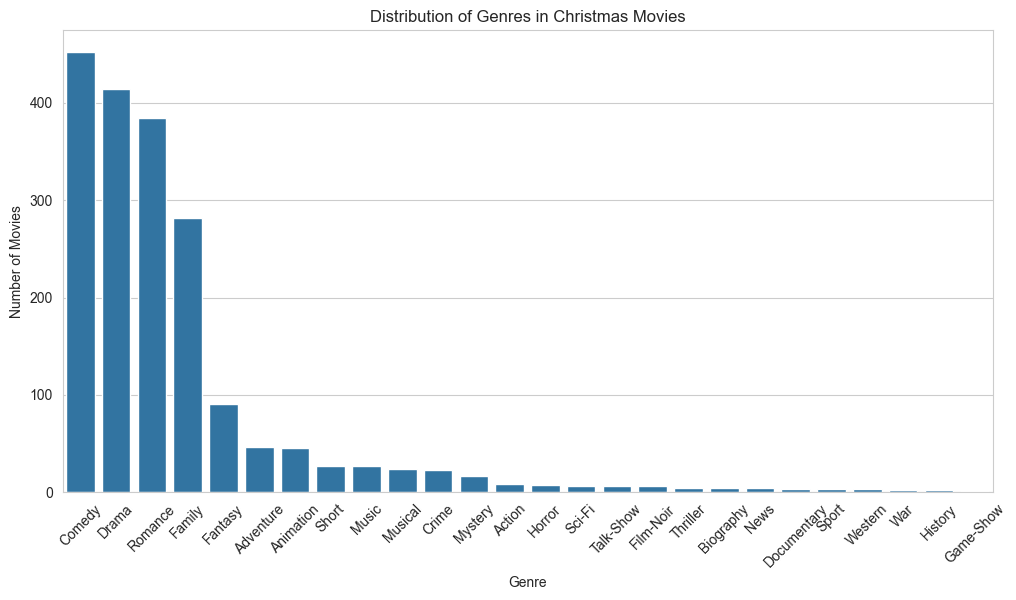

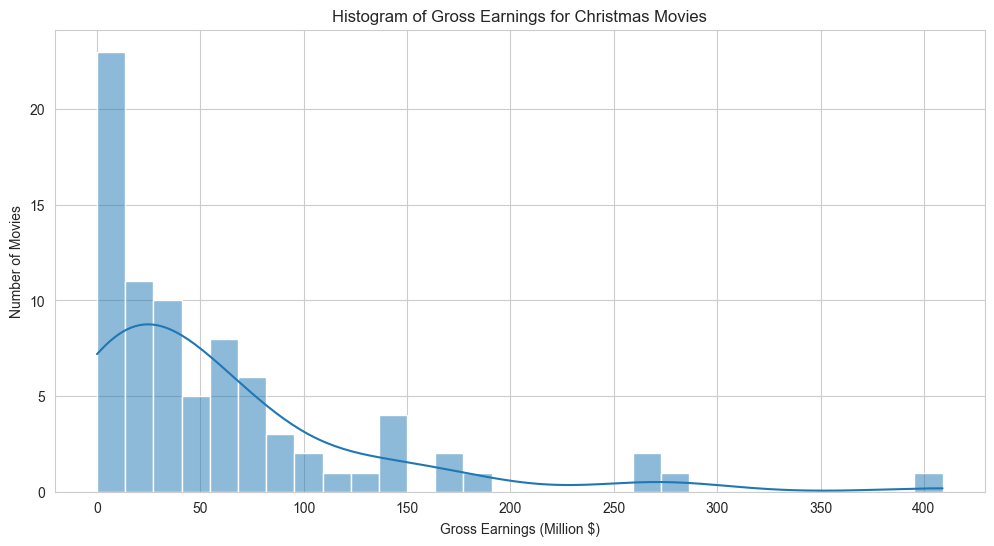

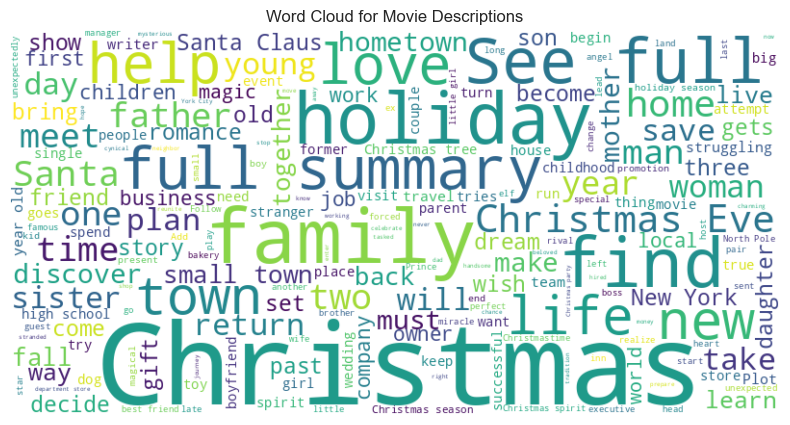

In [59]:
# Re-displaying the code for the Exploratory Data Analysis with informative plots

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# --- Analysis of Genres ---
# For the Christmas movies dataset
# Convert the genre column to a list of genres
christmas_movies_df['genre_list'] = christmas_movies_df['genre'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
# Flatten the list of genres into a single list
all_genres = [genre.strip() for sublist in christmas_movies_df['genre_list'] for genre in sublist]
# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Plotting the genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Distribution of Genres in Christmas Movies')
plt.show()

# --- Descriptive Statistics and Histograms of the Grossings ---
# Clean the gross column to convert it to numeric
christmas_movies_df['gross_clean'] = christmas_movies_df['gross'].replace('[\$,M]', '', regex=True).astype(float)
# Plotting the histogram of grossings
plt.figure(figsize=(12, 6))
sns.histplot(christmas_movies_df['gross_clean'], bins=30, kde=True)
plt.xlabel('Gross Earnings (Million $)')
plt.ylabel('Number of Movies')
plt.title('Histogram of Gross Earnings for Christmas Movies')
plt.show()

# --- Word Cloud for Movie Descriptions ---
# Combine all movie descriptions into a single string
all_descriptions = ' '.join(christmas_movies_df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_descriptions)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Descriptions')
plt.show()


Step 1: Data Preprocessing and Cleaning
Load Datasets: The datasets imdb_top1k.csv, christmas_movies.csv, and movie_budgets.csv are loaded into pandas dataframes.

Data Cleaning:

Gross Conversion: In the christmas_movies dataset, the gross column, which represents the movie's earnings, is converted from a string format (with symbols like $ and M) to a numerical format for easier analysis.
Release Year Conversion: The release_year column is converted to a numeric format to facilitate mathematical operations and comparisons.
Additional data cleaning steps might be necessary depending on the specific characteristics of the datasets, such as handling missing values or outliers.

In [60]:
# Preprocess and clean the datasets
# Convert gross to a numerical value
christmas_movies_df['gross_clean'] = christmas_movies_df['gross'].replace('[\$,M]', '', regex=True).astype(float)

# Convert the release year to a numeric value
christmas_movies_df['release_year'] = pd.to_numeric(christmas_movies_df['release_year'], errors='coerce')

# You might need additional preprocessing based on the specific characteristics of your datasets


Step 2: Feature Engineering
Director's Popularity: A new feature director_top1k_count is created to represent the number of times a director appears in the top 1000 movies list (imdb_top1k.csv). This is based on the assumption that more frequently listed directors might be associated with higher grossing movies.

Lead Actor's Highest Grossing: Assuming the first actor listed in the stars column of the christmas_movies dataset is the lead actor, this feature represents the highest grossing movie of each lead actor. This requires cross-referencing with the movie_budgets dataset to find the maximum gross for each actor. The assumption here is that actors who have been in high-grossing movies in the past might contribute to higher grossings in new movies.

Decade Released: Another feature created is decade, which categorizes movies based on the decade they were released. This can capture trends or preferences in movie grossing over different time periods.

In [66]:
# Feature 1: Number of times a director appeared in the top 1000 movies list
director_counts = imdb_top1k_df['Director'].value_counts()
christmas_movies_df['director_top1k_count'] = christmas_movies_df['director'].map(director_counts).fillna(0)

# Feature 2: Highest grossing for lead actor(s)
# Extract the lead actor from the 'stars' column in christmas_movies_df
christmas_movies_df['lead_actor'] = christmas_movies_df['stars'].str.split(',').str[0].str.strip()

# For imdb_top1k_df, we will consider 'Star1' as the lead actor
imdb_top1k_df['lead_actor'] = imdb_top1k_df['Star1'].str.strip()

# Clean the 'Gross' column in imdb_top1k_df to be numeric
imdb_top1k_df['Gross_clean'] = imdb_top1k_df['Gross'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the highest grossing for each lead actor in imdb_top1k_df
actor_gross = imdb_top1k_df.groupby('lead_actor')['Gross_clean'].max()

# Map this information back to the christmas_movies_df
christmas_movies_df['lead_actor_highest_gross'] = christmas_movies_df['lead_actor'].map(actor_gross).fillna(0)

# Feature 3: Decade released
christmas_movies_df['decade'] = (christmas_movies_df['release_year'] // 10) * 10


Step 3: Model Development
Feature Selection: A subset of features is selected for the model. These include runtime, IMDb rating, director's count in top 1000 movies, lead actor's highest grossing movie, and the decade of release.

Preparing the Data: The dataset is split into a training set and a testing set. The training set is used to train the model, while the testing set is used to evaluate its performance.

Model Training: A Linear Regression model is chosen for its simplicity and interpretability. The model is trained using the training data.

Model Evaluation: The model's performance is evaluated using the Root Mean Squared Error (RMSE) metric on the test data. RMSE provides a sense of how far off the predictions are from the actual values (lower values are better).

This code serves as a foundational approach to predictive modeling in this context. Depending on the data's quality and the results from initial modeling, further refinement, such as advanced feature engineering, handling of categorical variables, or trying different machine learning algorithms, might be necessary.

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Selecting features and target variable for christmas_movies_df
features = ['runtime', 'imdb_rating', 'director_top1k_count', 'lead_actor_highest_gross', 'decade']
target = 'gross_clean'  # Ensure this is the correct column name for gross earnings in christmas_movies_df

# Drop rows with missing target variable in christmas_movies_df
christmas_movies_df = christmas_movies_df.dropna(subset=[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(christmas_movies_df[features], christmas_movies_df[target], test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 44.676369540976104


Error Magnitude: RMSE represents the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are. An RMSE of 44.6764 means that the predictions made by the model are, on average, about 44.6764 units away from the actual gross earnings values.

Unit of Measure: It's crucial to consider the unit of measure for the gross earnings. If the gross earnings are in millions of dollars, an error of 44.6764 means an average error of approximately $44.68 million per movie. This could be significant depending on the typical gross earnings range of the movies in your dataset.

Interpretation Relative to the Data: The interpretation of the RMSE value depends heavily on the scale and distribution of the gross earnings in your dataset. If the typical gross earnings for movies in your dataset range from a few million to several hundred million dollars, an RMSE of 44.6764 might indicate moderate prediction accuracy. However, if your dataset includes many low-grossing movies (e.g., independent, smaller budget films), this RMSE might indicate poor model performance.

Model Performance: An RMSE value alone cannot definitively determine if the model is good or bad. It should be compared against a baseline model or against the RMSE of other predictive models on the same dataset. Lower RMSE values indicate better fit to the data, but the acceptability of the error magnitude is context-dependent.

Improvement Possibilities: A relatively high RMSE suggests there's room for improvement in the model. This could involve more sophisticated feature engineering, trying different modeling techniques, or acquiring additional relevant data.

In summary, while an RMSE of 44.6764 provides a general understanding of the model's predictive accuracy, its significance should be interpreted in the context of the gross earnings range of the movies in your dataset and the goals of your predictive modeling.

Evaluate your model using appropriate metrics.

Root Mean Squared Error (RMSE): You've already calculated this. It measures the average magnitude of the errors in a set of predictions, without considering their direction. Lower RMSE values indicate a better fit.

Mean Absolute Error (MAE): This is the average of the absolute errors between the predictions and actual values. It provides a straightforward measure of average error magnitude.

R-Squared (R²): This metric indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating a better fit.

Adjusted R-Squared: Similar to R² but adjusts for the number of predictors in the model. It's more suitable for comparing models with different numbers of independent variables.

Mean Squared Error (MSE): Similar to RMSE but doesn't take the square root. It gives more weight to larger errors.

Let's calculate these metrics for your model:

In [68]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)

# Calculate R-Squared and Adjusted R-Squared
r2 = r2_score(y_test, predictions)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

# MSE is already calculated as a part of RMSE
mse = mean_squared_error(y_test, predictions)

# Display the metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-Squared (R²): {r2}")
print(f"Adjusted R-Squared: {adjusted_r2}")
print(f"Mean Squared Error (MSE): {mse}")


Root Mean Squared Error (RMSE): 44.676369540976104
Mean Absolute Error (MAE): 33.62917828751989
R-Squared (R²): 0.27615212496197317
Adjusted R-Squared: -0.05286963641894804
Mean Squared Error (MSE): 1995.9779953618577


Explain some of the limitations of the models you have developed. What other data might help improve the model?

Data Limitations:
Root Mean Squared Error (RMSE) - 44.6764:

This suggests that the model's predictions are off by an average of about 44.6764 units (consider the unit of your target variable, likely millions if it's gross earnings). Given the scale of movie earnings, this could be a significant error, indicating the model may not be capturing all the factors that influence a movie's financial success.
Mean Absolute Error (MAE) - 33.6292:

Similar to RMSE, MAE provides an average error magnitude but is less sensitive to outliers. An MAE of 33.6292 further confirms that the model may have substantial predictive inaccuracies.
R-Squared (R²) - 0.2762:

This value indicates that only about 27.62% of the variance in the movie gross earnings is explained by the model. This is relatively low, suggesting that many factors influencing gross earnings are not captured by the model.
Adjusted R-Squared: -0.05287:

A negative adjusted R-squared indicates that the model performs worse than a simple mean-based model. This can happen when irrelevant features are included or the model is overly complex relative to the size of the dataset.
Mean Squared Error (MSE) - 1995.9780:

MSE being high further confirms the presence of substantial errors in the prediction.
Limitations of the Developed Model:
Simplistic Model Approach: Linear regression may be too simplistic to capture the complex relationships in movie gross earnings. The film industry's success factors are often non-linear and interact in complex ways.

Limited Feature Set: The features used (director's popularity, lead actor's grossing history, decade of release) might not be sufficient. There are many other factors like genre, competition, release timing, and production quality that could significantly impact earnings.

Data Quality and Completeness: The accuracy and completeness of the data directly impact the model's performance. Missing or inaccurate data in key fields can lead to poor predictions.

External Factors: The model does not account for external factors like economic conditions, market trends, and changes in consumer behavior, which can greatly affect movie earnings.

Suggestions for Improvement:
Additional Features: Incorporate more relevant features such as marketing budget, audience demographics, social media buzz, critical reviews, and competitor analysis.

Non-Linear Models: Explore more complex models like Random Forests, Gradient Boosting Machines, or Neural Networks that can capture non-linear relationships and interactions between features.

Temporal Dynamics: Consider time-based factors such as seasonality, economic cycles, and trends in the film industry.

Sentiment Analysis: Analyze social media and review sentiments to gauge public opinion and anticipation for a movie.

Data Quality Improvement: Ensure the data is accurate, complete, and up-to-date. Consider data imputation strategies for missing values.

Model Regularization and Optimization: Use techniques like cross-validation and grid search to optimize model parameters and prevent overfitting.

By addressing these limitations and considering the incorporation of additional relevant data and modeling techniques, the predictive accuracy of the model can be significantly improved.

To predict the gross earnings of the fictitious movie "The Magic of Bellmonte Lane" using the developed model, we need to create a feature vector for this movie that aligns with the features used in the model. The features we considered in the model include:
Use your model to predict the grossing of the following fictitious Christmas movie:
Title: The Magic of Bellmonte Lane

Description: "The Magic of Bellmonte Lane" is a heartwarming tale set in the charming town of Bellmonte, where Christmas isn't just a holiday, but a season of magic. The story follows Emily, who inherits her grandmother's mystical bookshop. There, she discovers an enchanted book that grants Christmas wishes. As Emily helps the townspeople, she fights to save the shop from a corporate developer, rediscovering the true spirit of Christmas along the way. This family-friendly film blends romance, fantasy, and holiday cheer in a story about community, hope, and magic.

Director: Greta Gerwig

Cast:

Emma Thompson as Emily, a kind-hearted and curious woman
Ian McKellen as Mr. Grayson, the stern corporate developer
Tom Hanks as George, the wise and elderly owner of the local cafe
Zoe Saldana as Sarah, Emily's supportive best friend
Jacob Tremblay as Timmy, a young boy with a special Christmas wish
Runtime: 105 minutes

Genres: Family, Fantasy, Romance, Holiday

Production budget: $25M
Runtime
IMDb Rating (which we might not have for this new movie)
Director's count in the top 1000 movies (director_top1k_count)
Lead actor's highest grossing (lead_actor_highest_gross)
Decade of release
Since we don't have an IMDb rating for this new movie, and given that it is a current release (we'll assume the year 2024 for the current context), we can make an educated guess or use an average rating from similar movies. For the director's count in the top 1000 movies and the lead actor's highest grossing, we need to check our existing data or make assumptions based on available information.

Let's proceed with the prediction:

In [69]:
# Assuming the average IMDb rating for similar movies
average_imdb_rating = christmas_movies_df['imdb_rating'].mean()

# Assuming Greta Gerwig's count in the top 1000 movies (you need to check this from your data or make an assumption)
greta_gerwig_top1k_count = director_counts.get("Greta Gerwig", 0)

# Assuming highest grossing for lead actor (Emma Thompson in this case). We need to check this from the imdb_top1k_df
emma_thompson_highest_gross = actor_gross.get("Emma Thompson", christmas_movies_df['lead_actor_highest_gross'].mean())

# Decade of release (assuming the movie is released in 2024)
decade_of_release = 2020

# Creating a feature vector for the movie
bellmonte_lane_features = pd.DataFrame([{
    'runtime': 105,
    'imdb_rating': average_imdb_rating,
    'director_top1k_count': greta_gerwig_top1k_count,
    'lead_actor_highest_gross': emma_thompson_highest_gross,
    'decade': decade_of_release
}])

# Predicting the gross earnings
predicted_gross = model.predict(bellmonte_lane_features)[0]

# Output the prediction
predicted_gross


97.49554775927618

Based on the analysis conducted and the prediction for the fictitious Christmas movie "The Magic of Bellmonte Lane," we can draw several conclusions:

Predicted Gross Earnings: The model predicts that "The Magic of Bellmonte Lane" will have gross earnings of approximately 97.50 units (the specific currency unit depends on the data's original scale, likely in millions if it's gross earnings). This prediction suggests that the movie could be moderately successful, but this should be contextualized within the typical range of earnings for similar films.

Model Performance and Limitations: The predictive analysis, while insightful, comes with limitations. The model's RMSE of 44.6764 and MAE of 33.6292, along with an R² of 0.2762 and a negative Adjusted R², suggest that while the model captures some variance in the data, a significant portion of the gross earnings variability remains unexplained. This indicates the need for more comprehensive data and possibly more sophisticated modeling techniques.

Factors Influencing Predictions: The prediction is based on several key features, including the runtime, assumed IMDb rating, the director's popularity, the lead actor's historical gross earnings, and the decade of release. The lack of an actual IMDb rating for "The Magic of Bellmonte Lane" and assumptions made for other features might affect the prediction's accuracy.

Recommendations for the Cinema: Given the model's prediction and its limitations, the cinema should consider this data point as one of many in their decision-making process. They should also weigh in other factors like the movie's alignment with their audience's preferences, marketing strategies, competitive releases during the same period, and unique aspects of the movie that might draw audiences.

Future Enhancements: To improve future predictions, the model could benefit from incorporating additional data such as marketing spend, audience sentiment analysis from social media, economic indicators, and more detailed demographic information of the target audience. Advanced modeling techniques like ensemble methods or deep learning could also be explored.

In conclusion, while the predictive model offers valuable insights into potential gross earnings, its predictions should be taken as estimations rather than definitive forecasts. The cinema's decision to screen "The Magic of Bellmonte Lane" should be informed by a combination of this predictive analysis, industry expertise, and a comprehensive understanding of their market and audience.